<a href="https://colab.research.google.com/github/rajendran-official/AI_ML_COURSE_ICT/blob/SVM/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer(as_frame=True)
df = data.frame
x = df.drop('target', axis=1)
y = df['target']

In [46]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: >

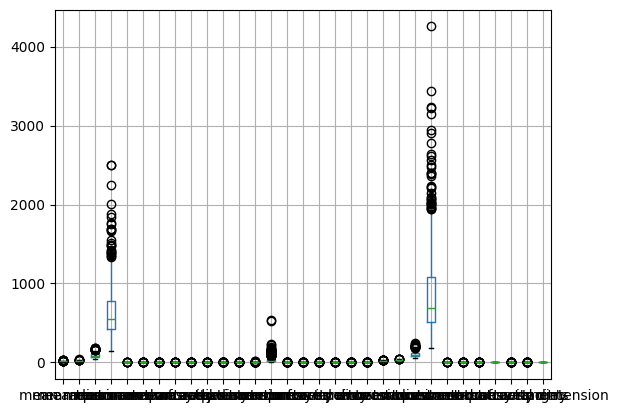

In [48]:
df.boxplot()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  f1_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)





In [50]:
ir =LogisticRegression()
ir.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
pred_lr = ir.predict(x_test)
print("Logistic regression F1:", f1_score(y_test, pred_lr))

Logistic regression F1: 0.9655172413793104


In [52]:
#Ensemble model
#bagging
#baseline Model
# Decision Tree (single tree)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print("Decision Tree F1:", f1_score(y_test, pred_dt))

Decision Tree F1: 0.9577464788732394


In [53]:
#bagging
# Random Forest (ensemble of many trees)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print("Random Forest F1:", f1_score(y_test, pred_rf))


Random Forest F1: 0.9722222222222222


In [65]:
#Adaboost

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100,random_state=42)
ada.fit(x_train, y_train)
pred_ada = ada.predict(x_test)
print("Adaboost F1:", f1_score(y_test, pred_ada))


Adaboost F1: 0.9790209790209791


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
pred_gb = gb.predict(x_test)
print("Gradient Boosting F1:", f1_score(y_test, pred_gb))

Gradient Boosting F1: 0.965034965034965


In [56]:
from sklearn.metrics import accuracy_score
models = {
          'Logistic ': ir,
          'Decision Tree': dt,
          'Random Forest': rf,
          'Adaboost': ab,
          'Gradient Boosting': gb
          }
for name, model in models.items():
  pred = model.predict(x_test)
  print(name,'Accuracy:',accuracy_score(y_test, pred))

Logistic  Accuracy: 0.956140350877193
Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
Adaboost Accuracy: 0.9736842105263158
Gradient Boosting Accuracy: 0.956140350877193


In [64]:
from sklearn.metrics import confusion_matrix
y_pred = ab.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  2]
 [ 1 70]]
